# This notebook is used to produce BPT (Baldwin, Phillips & Terlevich) diagrams using the pixel-by-pixel fit of the spectra.

### It uses the output maps from the ORCS routine (See ORCS documentation on GitHub), Amplitudes and FWHM, the distance_grow map produced after the identification of the regions (usefull if you want to track the changes in the line ratios values as a function of the distance of the ionization source), the galactocentric distance map, the total Halpha flux of each regions, etc. Note: These files are required for a more complete analysis, put you can still use this notebook and modify it, if you only have the ORCS output and are not interested in these additionnal parameters.

#### You have to change the name of the input files and the detection threshold values

It is important to note that the plots can be very heavy (a lots of data points) and therefore, to keep nice resolution and improve the fluidity of the scrooling while ready a paper that includes these plots, it is strongly suggested to save the plot outline (frame and text) in .pdf and the plot area (data points) in .png. Then you Combine the two files in latex to produce the final plot. If you have any other way to do that, let me know because it is really anoying. 

In [1]:
# Laurie
# Import Libraries
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy
from scipy import ndimage
from matplotlib.lines import Line2D
from pylab import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from numpy import histogram2d as histogram2d
from numpy import sqrt, pi, exp, loadtxt
from lmfit import Model
from matplotlib.colors import LogNorm
from matplotlib import contour
from copy import deepcopy

In [2]:
# Read data

dis = fits.open('NGC628_distance_grow.fits')
dis.info()
d = dis[0].data
dis.close()

# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_dataha = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits')
ahdu_list2.info()
aimage_datan2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits')
ahdu_list3.info()
aimage_datan21 = ahdu_list3[0].data
ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_dataha = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.fwhm.clean.fits')
fhdu_list2.info()
fimage_datan2 = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.fwhm.clean.fits')
fhdu_list3.info()
fimage_datan21 = fhdu_list3[0].data
fhdu_list3.close()
                    
s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_datan2[np.where(aimage_datan2 < 0)] = 0
aimage_datan21[np.where(aimage_datan21 < 0)] = 0
fimage_datan2[np.where(aimage_datan2 < 0)] = 0
fimage_datan21[np.where(aimage_datan21 < 0)] = 0
                       
image_data = (((aimage_datan2*fimage_datan2)+(aimage_datan21*fimage_datan21))/(1.339*aimage_dataha*fimage_dataha))
image_data = np.log10(image_data)
#image_data[np.where(aimage_dataha < 1.2e-18)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[np.where(image_data == 0)] = 500
n2h = image_data

# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits')
ahdu_list1.info()
aimage_datao3 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits')
ahdu_list2.info()
aimage_datahb = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.amplitude.clean.int3.fits')
ahdu_list3.info()
aimage_datao31 = ahdu_list3[0].data
ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits')
fhdu_list1.info()
fimage_datao3 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits')
fhdu_list2.info()
fimage_datahb = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.fwhm.clean.int3.fits')
fhdu_list3.info()
fimage_datao31 = fhdu_list3[0].data
fhdu_list3.close()
                    

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_datao3[np.where(aimage_datao3 < 0)] = 0
aimage_datahb[np.where(aimage_datahb < 0)] = 0
fimage_datao3[np.where(fimage_datao3 < 0)] = 0
fimage_datahb[np.where(fimage_datahb < 0)] = 0
aimage_datao31[np.where(aimage_datao31 < 0)] = 0
fimage_datao31[np.where(fimage_datao31 < 0)] = 0
                       
image_data = (((aimage_datao3*fimage_datao3)+(aimage_datao31*fimage_datao31))/(1.333*aimage_datahb*fimage_datahb))
#image_data[(aimage_datahb >= 4e-19) & (image_data == 0)] = 0.000001
image_data = np.log10(image_data)
#image_data[(aimage_datahb < 5.5e-19) & (aimage_datao3 < 5.5e-19)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
#image_data[(image_data > 1.5) & (image_data < 499)] = 5
o3h = image_data

# Source identification mask
gr= fits.open('NGC628_HIIPhot3_All_GROW.fits')
gr.info()
grow = gr[0].data
gr.close()

# Galactocentric radius position of each pixel
r= fits.open('NGC628_SITELLE_rayon_pc_carte.fits')
r.info()
ra = r[0].data
r.close()

# Total Ha flux of each identified regions 
flux_tot = fits.getdata('NGC628_flux_tot_regions.fits')

Filename: NGC628_distance_grow.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.fwhm.clean.fits
No.    Name         Type      Cards   Dimens

Filename: NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.fwhm.clean.i

In [3]:
# remove values below detection threshold
fn2h = n2h
fo3h = o3h

fn2h[(aimage_dataha < 1.2e-18) & (aimage_datan2 < 1.0e-18)] = -3
fo3h[(aimage_datao3 < 0.6e-18) & (aimage_datahb < 0.6e-18)] = -5

fn2h[(fn2h == 0)] = -3
fo3h[(fo3h == 0)] = -5

In [4]:
# Building the arrays of data points while excluding out of bound values
ffn2h = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
ffo3h = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
rr = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))
dd = np.array(len(n2h[(n2h > -3) & (o3h > -5)]) & (fn2h < 500) & (fo3h < 500))


ffn2h = fn2h[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]

ffo3h = fo3h[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]

rr = ra[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]

dd = d[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]

fflu = (10/1.20671*aimage_dataha[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]*\
    fimage_dataha[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)])

<IPython.core.display.Javascript object>


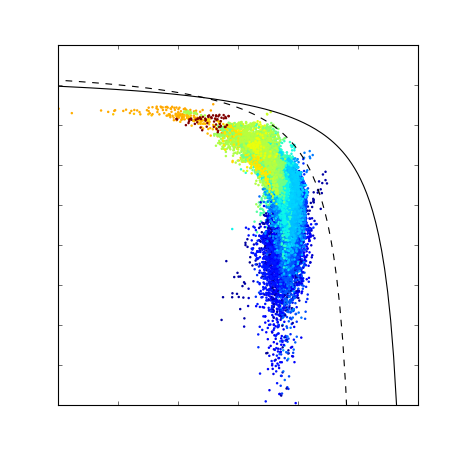

In [5]:
# Plot only the datapoint area of the plot for the BPT digram (NII/Ha vs OIII/Hb) 
# as a function of the galactocentric distance
# To be saved as a .png to avoid problems with scrolling in the latex file
# the plot outline (frame and text) follows and is saved as a .pdf to avoid ugly resolution and pixelized text

%matplotlib nbagg
fig = plt.figure(figsize=(5.8,5.625))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=4,
    width=0.5,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off

h=5e-17 # to plot only pixels with flux above h 
plt.scatter(ffn2h[(dd < 150) & (fflu > h)], ffo3h[(dd < 150) & (fflu > h)], marker='.', \
            c=rr[(dd < 150) & (fflu > h)]/1000, linewidths = 0.0)
# Show the boundary between the BPT traditional regions:
plt.plot(np.arange(160.)/40-3, 0.61/(np.arange(160.)/40-3.05) + 1.3, linestyle='--', c='k')
plt.plot(np.arange(135.)/40-3, 0.61/(np.arange(135.)/40-3.47) + 1.19, c='k')

plt.clim(0,18)

plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()

In [134]:
#Save the Plot data points in a .png file
plt.savefig('NGC628_BPT_distance_gal_t.png', transparent=False, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


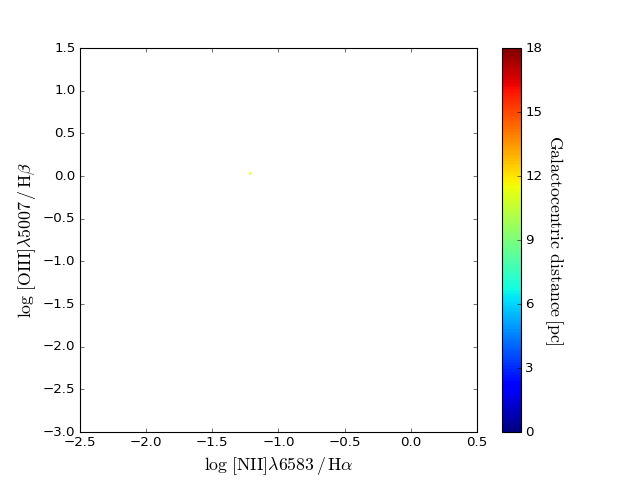

In [6]:
# Plot outline for the BPT digram (NII/Ha vs OIII/Hb) as a function of the galactocentric distance
# can be modified to produce the plot outline (frame and text)

%matplotlib nbagg

plt.scatter(ffn2h[0], ffo3h[0], marker='.', c=rr[0]/1000, linewidths = 0.0)

cbar=plt.colorbar(ticks=[0,3,6,9,12,15,18],pad=0.05)
cbar.set_label('$\mathrm{Galactocentric\,\,distance\,[pc]}$', rotation=270, \
               fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(0,18)

plt.xlabel('$\mathrm{log\,\,[NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha}$', \
           fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta}$', \
           fontsize=16, fontname = 'Helvetica')
plt.xlim(-2.5,0.5)
plt.ylim(-3,1.5)
plt.show()

In [51]:
#Save the Plot outline in a .pdf file
plt.savefig('NGC628_BPT_distance_gal_t.pdf', transparent=False, bbox_inches='tight', pad_inches=0.04)

# From this point you probably understand the idea... so you can use the above cells to produce any of your favorite BPT diagram.

### The next cells produce other BPT diagrams with respect to different parameters... There is less comments... and it is less clean... so use with causion :P